## Image Segmentation
Segmentation partitions an image into regions having similar visual appearance corresponding to parts of object.
We will try to extract the most dominant 'K' Colors using K-Means.
We can apply K-Means with each pixel will reassigned to the colset of the K Colors , leading to segmentation.

In [1]:
# Read one image
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# cv2 reads an image in BGR Format
im = cv2.imread('image.jpg')
# convert from BGR to RGB
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

(3184, 4350, 3)


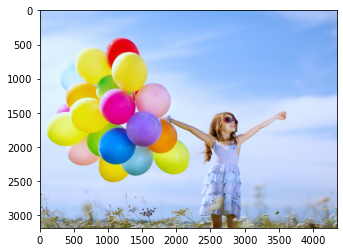

In [3]:
# show image as RGB format
plt.imshow(im)
plt.show()

In [4]:
# We want to flatten each channel of image
all_pixels = im.reshape((-1,3))
print(all_pixels.shape)
# we got 3 linear array for each color i.e. for red blue and green 

(13850400, 3)


In [5]:
from sklearn.cluster import KMeans

In [ ]:
dominant_colors  = 20;
km = KMeans(n_clusters = dominant_colors)
km.fit(all_pixels)

In [60]:
centers = km.cluster_centers_
# RBG values 
centers

array([[215.28568162, 232.34633126, 253.49238572],
       [153.53799771, 172.95511962, 205.65550718],
       [225.27111349, 223.47850602,  70.55896301],
       [147.69967578, 189.9286939 , 251.99526249],
       [119.28875567, 136.16971865, 156.51001329],
       [129.55202328, 115.63418051,  80.64418969],
       [220.5492391 ,  12.34051462, 143.22406632],
       [173.88993862, 202.56601755, 248.47484359],
       [223.90449656,  11.61795205,  20.00896805],
       [223.44892335, 211.28408108,  13.19459825],
       [218.50249142, 184.36036893, 199.29874713],
       [126.6395606 , 177.16695525, 245.40345831],
       [147.59901907, 103.70202157, 224.28217233],
       [ 85.12932383,  60.65375582,  29.34301395],
       [  6.00866113, 115.72960953, 218.56366504],
       [130.26446717, 195.5735281 ,  23.84453525],
       [184.26210961, 153.15035318, 133.37444061],
       [198.8186257 , 218.01941602, 253.6726243 ],
       [221.375346  , 132.36771585,  15.50777057],
       [224.67531683, 230.05134

In [61]:
centers = np.array(centers , dtype = 'uint8')
centers
# these are the RGB values for a particular dominnat color

array([[215, 232, 253],
       [153, 172, 205],
       [225, 223,  70],
       [147, 189, 251],
       [119, 136, 156],
       [129, 115,  80],
       [220,  12, 143],
       [173, 202, 248],
       [223,  11,  20],
       [223, 211,  13],
       [218, 184, 199],
       [126, 177, 245],
       [147, 103, 224],
       [ 85,  60,  29],
       [  6, 115, 218],
       [130, 195,  23],
       [184, 153, 133],
       [198, 218, 253],
       [221, 132,  15],
       [224, 230, 129]], dtype=uint8)

#### Plot what all color are these ?

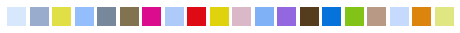

In [64]:
# I am going to plot 6 boxes each having differnt color
# Subplotting
i = 1
# ye just size a ak box ka ki kitna chahiye
# you can skip this also
plt.figure(0,figsize=(8,2))

colors = []

for each_col in centers :
    # here 1 row having 6 columns and we are in ith box 
    plt.subplot(1,20,i)
    plt.axis("off")
    i = i + 1
    
    colors.append(each_col)
    
    # Color Swatch
    a = np.zeros((100,100,3) , dtype = 'uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
plt.show()
# Here we have extracted the most dominant colors    

In [65]:
colors

[array([215, 232, 253], dtype=uint8),
 array([153, 172, 205], dtype=uint8),
 array([225, 223,  70], dtype=uint8),
 array([147, 189, 251], dtype=uint8),
 array([119, 136, 156], dtype=uint8),
 array([129, 115,  80], dtype=uint8),
 array([220,  12, 143], dtype=uint8),
 array([173, 202, 248], dtype=uint8),
 array([223,  11,  20], dtype=uint8),
 array([223, 211,  13], dtype=uint8),
 array([218, 184, 199], dtype=uint8),
 array([126, 177, 245], dtype=uint8),
 array([147, 103, 224], dtype=uint8),
 array([85, 60, 29], dtype=uint8),
 array([  6, 115, 218], dtype=uint8),
 array([130, 195,  23], dtype=uint8),
 array([184, 153, 133], dtype=uint8),
 array([198, 218, 253], dtype=uint8),
 array([221, 132,  15], dtype=uint8),
 array([224, 230, 129], dtype=uint8)]

### Segmenting Our Original Image

In [ ]:
# Make a new iamge with same shape as original
new_img = np.zeros((3184*4350, 3) , dtype = 'uint8')
print(new_img.shape)

In [67]:
km.labels_

array([ 7,  7,  7, ..., 13,  5,  5])

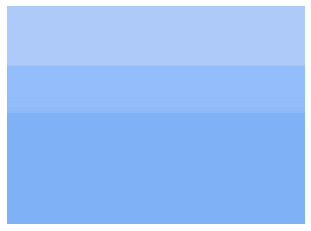

In [69]:
# we will iterate over every pixel and will check what is the closest center to this pixel 
for ix in range(new_img.shape[0]) :
    # color put kar rahe h hum isme according to color dominant
    new_img[ix] = colors[km.labels_[ix]]

new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.axis("off")
plt.show()